# Final assignment Thijs Vizee

## Introduction 

INFO

In [5]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import requests
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1. Data Clarification 

To predict car prices I have chosen to scrape information from the website autoscout24 (nd). This is a website where both individuals and companies can put second-hand cars for sale. Any type of car can be offered. In total there are 156,792 used cars for sale on this website. I chose to filter my search criteria, which ultimately left 132 cars. I chose to filter for cars no older than 12 years, driven less than 100,000 miles, 4 or 5 doors, used and below 100.000 Euros. I would like to conduct targeted research and have therefore chosen to apply these filters.

For scraping I chose to use a web scraper. Namely WebScraper (nd). After installing the web scraper I started scraping myself. To do this I had to take some steps. The steps are further explained below on the basis of images and short texts.

## 2. Gathering Data 

### 2.1 Scraping Data Explained per Step 

Below you will find a detailed step-by-step plan which I have applied to scrape my data. Each step describes on the basis of an image what exactly has been done per step.

#### 2.2 Step 1 

INFO

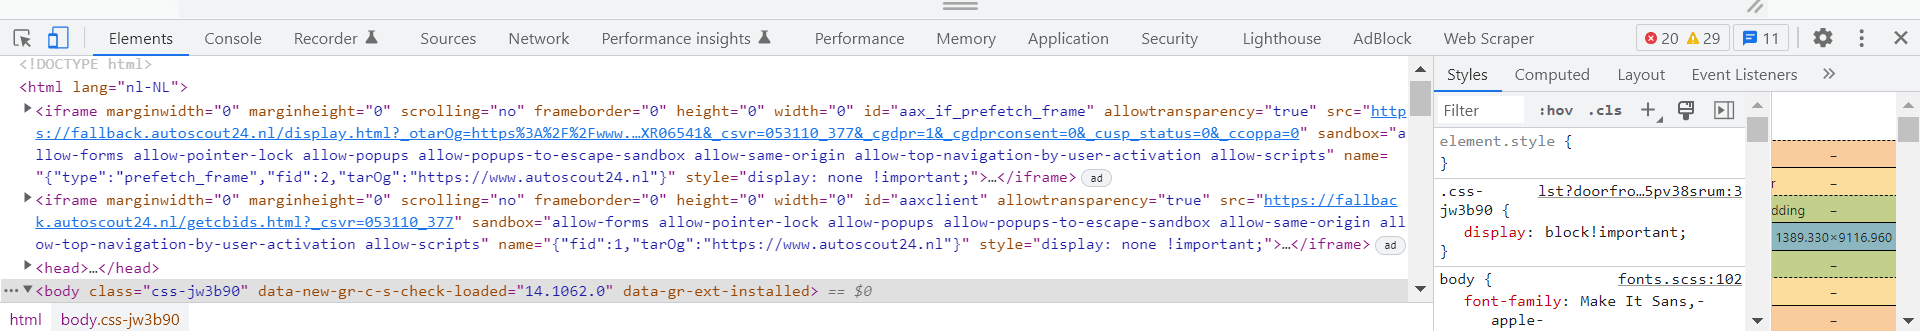

#### 2.3 Step 2 

INFO

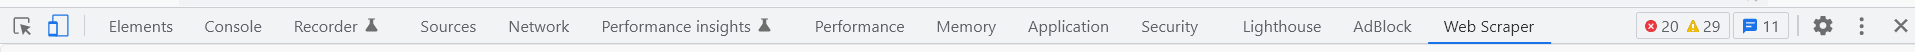

#### 2.4 Step 3 

INFO

#### 2.5 Step 4 

INFO

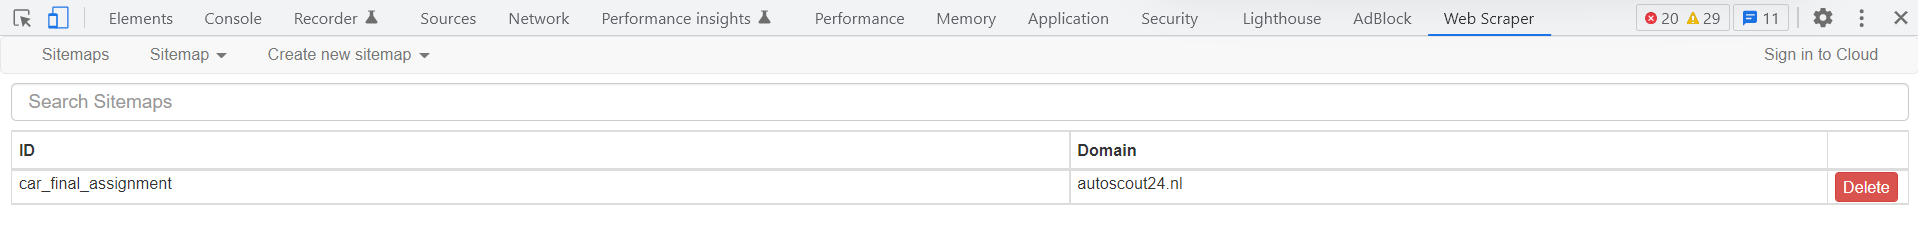

#### 2.6 Step 5 

INFO

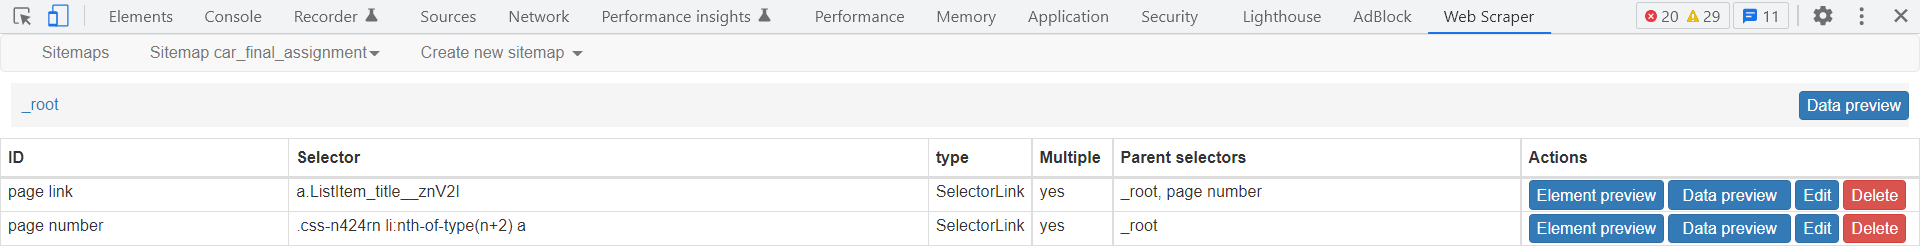

#### 2.7 Step 6 

INFO

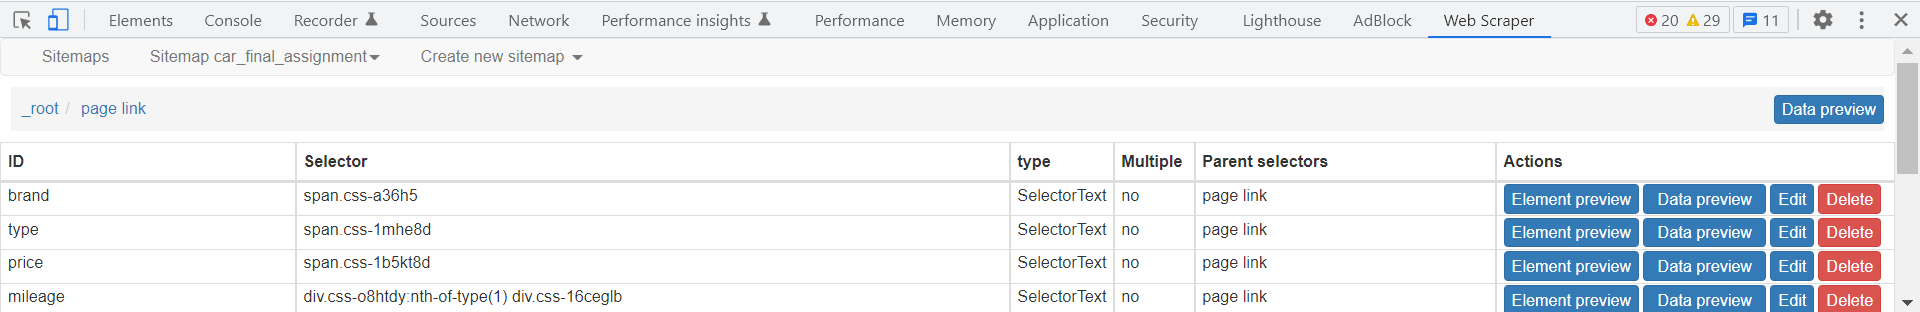

#### 2.8 Step 7 

INFO

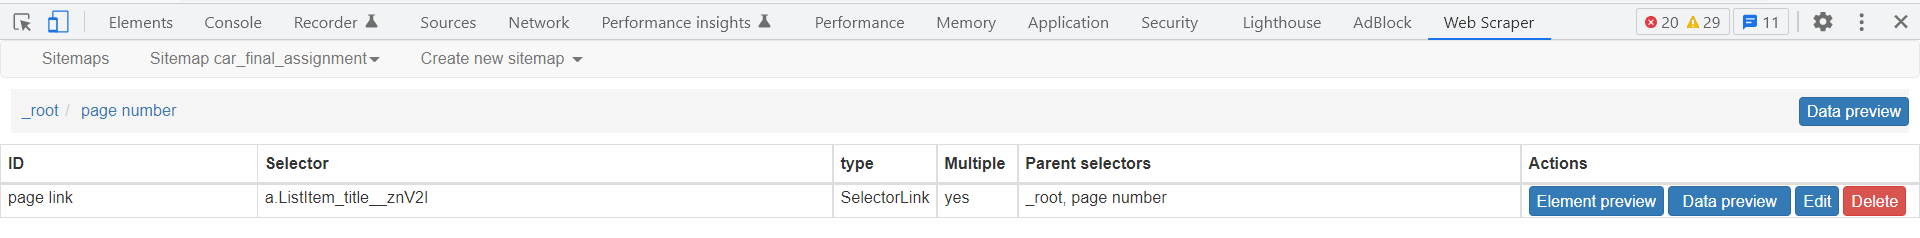

#### 2.9 Step 8 

INFO

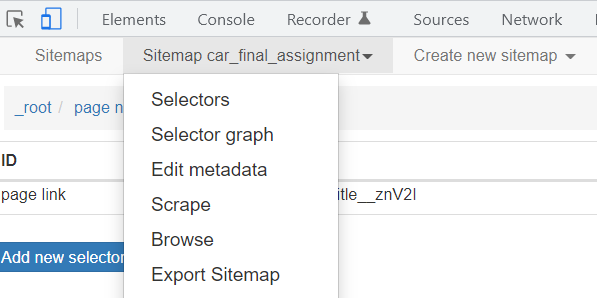

#### 2.10 Step 9 

INFO

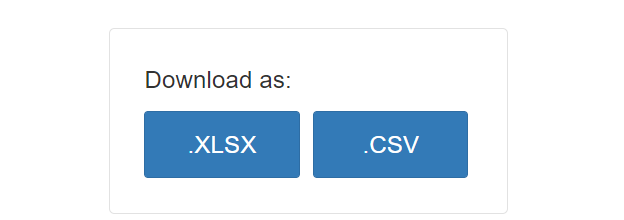

## 3. Data Cleaning 

### 3.1 Data Set Explanation 

In [6]:
df = pd.read_excel('car_final_assignment.xlsx')
df.head()

,web-scraper-order,web-scraper-start-url,page link,page link-href,brand,type,price,mileage,transmission,construction year,fuel,power,car body,category,doors,page number,page number-href
0,1654169641-181,https://www.autoscout24.nl/lst?doorfrom=4&door...,Audi S5 Sportback 3.0 TFSI quattro PANO HUD B&...,https://www.autoscout24.nl/aanbod/audi-s5-spor...,Audi,S5,"€ 53.949,-",30.961 km,Automatisch,06/2018,Benzine,260 kW (354 PK),Hatchback,Gebruikt,5,4.0,https://www.autoscout24.nl/lst?doorfrom=4&door...
1,1654169052-91,https://www.autoscout24.nl/lst?doorfrom=4&door...,"Volvo XC60 T8 Twin Engine Inscription, Scandin...",https://www.autoscout24.nl/aanbod/volvo-xc60-t...,Volvo,XC60,"€ 54.900,-1",71.650 km,Automatisch,03/2019,Elektro/Benzine,223 kW (303 PK),SUV/Off-Road/Pick-Up,Gebruikt,5,20.0,https://www.autoscout24.nl/lst?doorfrom=4&door...
2,1654169216-115,https://www.autoscout24.nl/lst?doorfrom=4&door...,Mercedes-Benz S 63 AMG 4Matic Lang | Parkeerpa...,https://www.autoscout24.nl/aanbod/mercedes-ben...,Mercedes-Benz,S 63 AMG,"€ 77.945,-",88.915 km,Automatisch,05/2016,Benzine,430 kW (585 PK),Sedan,Gebruikt,4,8.0,https://www.autoscout24.nl/lst?doorfrom=4&door...
3,1654169772-204,https://www.autoscout24.nl/lst?doorfrom=4&door...,MINI Cooper SE Countryman 2.0 ALL4 Chili | Led...,https://www.autoscout24.nl/aanbod/mini-cooper-...,MINI,Cooper SE Countryman,"€ 36.694,-1",42.714 km,Automatisch,03/2019,Elektro/Benzine,165 kW (224 PK),SUV/Off-Road/Pick-Up,Gebruikt,5,3.0,https://www.autoscout24.nl/lst?doorfrom=4&door...
4,1654169924-231,https://www.autoscout24.nl/lst?doorfrom=4&door...,Jaguar XE 3.0 S 381pk UNIEK! VOL OPTIESportond...,https://www.autoscout24.nl/aanbod/jaguar-xe-3-...,Jaguar,XE,"€ 36.990,-",79.000 km,Automatisch,11/2017,Benzine,280 kW (381 PK),Sedan,Gebruikt,4,2.0,https://www.autoscout24.nl/lst?doorfrom=4&door...


INFO

### 3.2 Data Cleaning Process 

In [7]:
df_subset = df[['brand','price','mileage','transmission','power','fuel','car body','category','doors','construction year']]
df_subset.head()

,brand,price,mileage,transmission,power,fuel,car body,category,doors,construction year
0,Audi,"€ 53.949,-",30.961 km,Automatisch,260 kW (354 PK),Benzine,Hatchback,Gebruikt,5,06/2018
1,Volvo,"€ 54.900,-1",71.650 km,Automatisch,223 kW (303 PK),Elektro/Benzine,SUV/Off-Road/Pick-Up,Gebruikt,5,03/2019
2,Mercedes-Benz,"€ 77.945,-",88.915 km,Automatisch,430 kW (585 PK),Benzine,Sedan,Gebruikt,4,05/2016
3,MINI,"€ 36.694,-1",42.714 km,Automatisch,165 kW (224 PK),Elektro/Benzine,SUV/Off-Road/Pick-Up,Gebruikt,5,03/2019
4,Jaguar,"€ 36.990,-",79.000 km,Automatisch,280 kW (381 PK),Benzine,Sedan,Gebruikt,4,11/2017


INFO

In [8]:
brand_dummy = pd.get_dummies(df_subset["brand"])
df_subset = pd.concat([df_subset, brand_dummy], axis=1)

In [9]:
transmission_dummy = pd.get_dummies(df_subset["transmission"])
df_subset = pd.concat([df_subset, transmission_dummy], axis=1)

In [10]:
fuel_dummy = pd.get_dummies(df_subset["fuel"])
df_subset = pd.concat([df_subset, fuel_dummy], axis=1)

In [11]:
category_dummy = pd.get_dummies(df_subset["category"])
df_subset = pd.concat([df_subset, category_dummy], axis=1)

In [12]:
car_body_dummy = pd.get_dummies(df_subset["car body"])
df_subset = pd.concat([df_subset, car_body_dummy], axis=1)

In [13]:
df_subset.head()

,brand,price,mileage,transmission,power,fuel,car body,category,doors,construction year,...,Elektro/Diesel,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen
0,Audi,"€ 53.949,-",30.961 km,Automatisch,260 kW (354 PK),Benzine,Hatchback,Gebruikt,5,06/2018,...,0,0,0,1,0,1,0,0,0,0
1,Volvo,"€ 54.900,-1",71.650 km,Automatisch,223 kW (303 PK),Elektro/Benzine,SUV/Off-Road/Pick-Up,Gebruikt,5,03/2019,...,0,0,0,1,0,0,0,1,0,0
2,Mercedes-Benz,"€ 77.945,-",88.915 km,Automatisch,430 kW (585 PK),Benzine,Sedan,Gebruikt,4,05/2016,...,0,0,0,1,0,0,0,0,1,0
3,MINI,"€ 36.694,-1",42.714 km,Automatisch,165 kW (224 PK),Elektro/Benzine,SUV/Off-Road/Pick-Up,Gebruikt,5,03/2019,...,0,0,0,1,0,0,0,1,0,0
4,Jaguar,"€ 36.990,-",79.000 km,Automatisch,280 kW (381 PK),Benzine,Sedan,Gebruikt,4,11/2017,...,0,0,0,1,0,0,0,0,1,0


INFO

In [14]:
for col in df_subset.columns:
    print(col)

brand
price
mileage
transmission
power
fuel
car body
category
doors
construction year
Alfa Romeo
Aston Martin
Audi
BMW
FISKER
Ford
Hyundai
Jaguar
Kia
Lexus
MINI
Mazda
Mercedes-Benz
Peugeot
Porsche
SEAT
Toyota
Volkswagen
Volvo
-
Automatisch
Handgeschakeld
Benzine
Diesel
Elektrisch
Elektro/Benzine
Elektro/Diesel
LPG
Waterstof
Gebruikt
Coupé
Hatchback
MPV
SUV/Off-Road/Pick-Up
Sedan
Stationwagen


INFO

In [15]:
df_subset = df_subset.drop(['brand','transmission','fuel','car body','category'], axis = 1)
df_subset

,price,mileage,power,doors,construction year,Alfa Romeo,Aston Martin,Audi,BMW,FISKER,...,Elektro/Diesel,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen
0,"€ 53.949,-",30.961 km,260 kW (354 PK),5,06/2018,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,"€ 54.900,-1",71.650 km,223 kW (303 PK),5,03/2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,"€ 77.945,-",88.915 km,430 kW (585 PK),4,05/2016,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,"€ 36.694,-1",42.714 km,165 kW (224 PK),5,03/2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,"€ 36.990,-",79.000 km,280 kW (381 PK),4,11/2017,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,"€ 46.950,-",40.037 km,241 kW (328 PK),5,05/2019,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
128,"€ 16.700,-",76.957 km,121 kW (165 PK),5,06/2015,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
129,"€ 27.500,-",56.000 km,165 kW (224 PK),4,07/2018,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
130,"€ 26.900,-1",20.372 km,103 kW (140 PK),5,03/2020,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


INFO

In [16]:
df_subset['price'] = df_subset['price'].astype(str).str[1:8]

In [17]:
df_subset['mileage'] = df_subset['mileage'].astype(str).str[0:6]

In [18]:
df_subset['power'] = df_subset['power'].astype(str).str[8:11]

In [19]:
df_subset['construction year'] = df_subset['construction year'].astype(str).str[3:8]
df_subset

,price,mileage,power,doors,construction year,Alfa Romeo,Aston Martin,Audi,BMW,FISKER,...,Elektro/Diesel,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen
0,53.949,30.961,354,5,2018,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,54.900,71.650,303,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,77.945,88.915,585,4,2016,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36.694,42.714,224,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,36.990,79.000,381,4,2017,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,46.950,40.037,328,5,2019,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
128,16.700,76.957,165,5,2015,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
129,27.500,56.000,224,4,2018,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
130,26.900,20.372,140,5,2020,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


INFO

In [20]:
df_new = df_subset.rename(columns={'power': 'power_in_pk','mileage':'mileage_in_km','price':'price_in_EU','construction year':'construction_year'})
df_new

,price_in_EU,mileage_in_km,power_in_pk,doors,construction_year,Alfa Romeo,Aston Martin,Audi,BMW,FISKER,...,Elektro/Diesel,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen
0,53.949,30.961,354,5,2018,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,54.900,71.650,303,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,77.945,88.915,585,4,2016,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36.694,42.714,224,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,36.990,79.000,381,4,2017,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,46.950,40.037,328,5,2019,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
128,16.700,76.957,165,5,2015,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
129,27.500,56.000,224,4,2018,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
130,26.900,20.372,140,5,2020,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


INFO

In [21]:
df_new['price_in_EU'] = df_new['price_in_EU'].str.replace(r".", r"", regex=False).astype(int)
df_new

,price_in_EU,mileage_in_km,power_in_pk,doors,construction_year,Alfa Romeo,Aston Martin,Audi,BMW,FISKER,...,Elektro/Diesel,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen
0,53949,30.961,354,5,2018,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,54900,71.650,303,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,77945,88.915,585,4,2016,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,36694,42.714,224,5,2019,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,36990,79.000,381,4,2017,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,46950,40.037,328,5,2019,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
128,16700,76.957,165,5,2015,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
129,27500,56.000,224,4,2018,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
130,26900,20.372,140,5,2020,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


INFO

In [22]:
for col in df_new.columns:
    print(col)

price_in_EU
mileage_in_km
power_in_pk
doors
construction_year
Alfa Romeo
Aston Martin
Audi
BMW
FISKER
Ford
Hyundai
Jaguar
Kia
Lexus
MINI
Mazda
Mercedes-Benz
Peugeot
Porsche
SEAT
Toyota
Volkswagen
Volvo
-
Automatisch
Handgeschakeld
Benzine
Diesel
Elektrisch
Elektro/Benzine
Elektro/Diesel
LPG
Waterstof
Gebruikt
Coupé
Hatchback
MPV
SUV/Off-Road/Pick-Up
Sedan
Stationwagen


## 4. Exploratory Data Analysis 

### 4.1 Distributions 

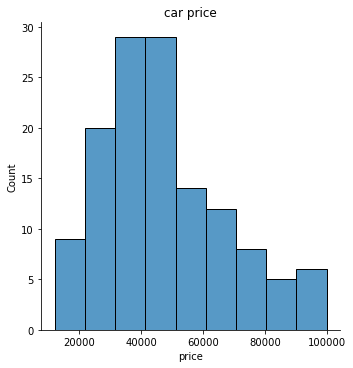

In [23]:
df_new['price_in_EU'].name = 'price' 
price = df_new['price_in_EU'].dropna()
sns.displot(price, kde=False) 
plt.title('car price')
plt.show()

INFO

C:\Users\thijs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thijs\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


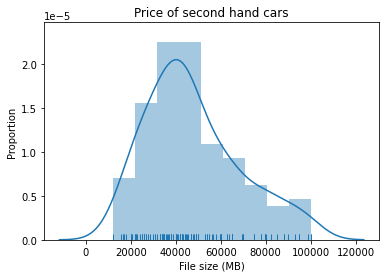

In [24]:
sns.distplot(price, rug=True)
plt.title('Price of second hand cars')
plt.xlabel('File size (MB)')
plt.ylabel('Proportion')
plt.show()

INFO

C:\Users\thijs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\thijs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


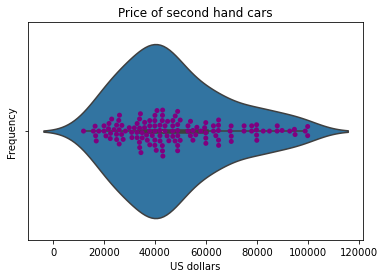

In [25]:
df_paid = df_new[df_new['price_in_EU'] > 0] 
sns.violinplot(df_paid['price_in_EU'])
sns.swarmplot(df_paid['price_in_EU'], color='purple') 
plt.title('Price of second hand cars')
plt.ylabel('Frequency')
plt.xlabel('US dollars')
plt.show()

INFO

In [26]:
df_new['mean_price_per_car'] = df_new.loc[:,'price_in_EU':'price_in_EU'].mean(axis=1)

In [27]:
df_new.head()

,price_in_EU,mileage_in_km,power_in_pk,doors,construction_year,Alfa Romeo,Aston Martin,Audi,BMW,FISKER,...,LPG,Waterstof,Gebruikt,Coupé,Hatchback,MPV,SUV/Off-Road/Pick-Up,Sedan,Stationwagen,mean_price_per_car
0,53949,30.961,354,5,2018,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,53949.0
1,54900,71.650,303,5,2019,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,54900.0
2,77945,88.915,585,4,2016,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,77945.0
3,36694,42.714,224,5,2019,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,36694.0
4,36990,79.000,381,4,2017,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,36990.0


INFO

The median car price is: 42972.5
The mean car price is: 47636.068181818184


C:\Users\thijs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


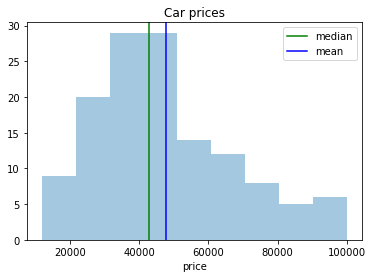

In [28]:
mean_size = df_new['price_in_EU'].mean()
median_size = df_new['price_in_EU'].median()

print(f'The median car price is: {median_size}')
print(f'The mean car price is: {mean_size}')

sns.distplot(price, kde=False)
plt.title('Car prices')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

INFO

In [59]:
corr = df_new[['doors', 'construction_year', 'mean_price_per_car']].corr()
corr

,doors,mean_price_per_car
doors,1.000000,-0.096594
mean_price_per_car,-0.096594,1.000000


INFO

In [51]:
x = df_new[['mean_price_per_car']]
y = df_new['price_in_EU']
lm = LinearRegression()
lm.fit(x, y)
df_new['price_in_EU_p'] = lm.predict(x)
df_new['resid'] = df_new['price_in_EU'] - df_new['price_in_EU_p']

INFO

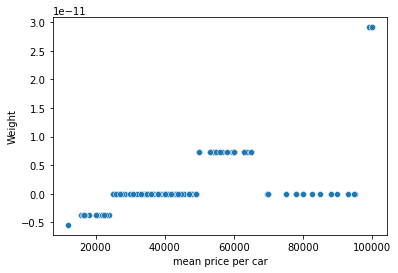

In [52]:
sns.scatterplot(x='mean_price_per_car',y='resid',data=df_new)
plt.xlabel('mean price per car')
plt.ylabel('Weight')
plt.show()

INFO

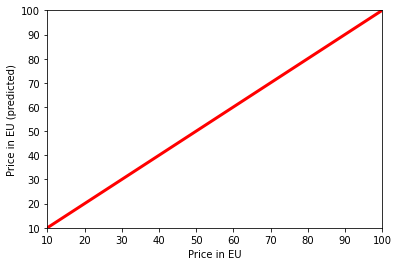

In [54]:
sns.scatterplot(x='price_in_EU',y='price_in_EU',data=df_new)
plt.xlim(10, 100) 
plt.ylim(10, 100) 
plt.plot([0, 100], [0, 100], color='red', lw=3) 
plt.xlabel('Price in EU')
plt.ylabel('Price in EU (predicted)')
plt.show()

INFO

In [55]:
r2_score(df_new['price_in_EU'], df_new['price_in_EU_p'])

1.0

INFO

In [56]:
math.sqrt(mean_squared_error(df_new['price_in_EU'], df_new['price_in_EU_p']))

5.5231710409681255e-12

INFO

## 5. Model Building 

In [32]:
df_new['price_in_EU'].value_counts()

39950    5
48900    5
37950    3
62950    2
25949    2
        ..
26067    1
46995    1
23949    1
59500    1
43945    1
Name: price, Length: 108, dtype: int64

INFO

In [43]:
X = df_new[['mileage_in_km','power_in_pk','doors','construction_year','Mercedes-Benz','Audi','BMW','Benzine','Gebruikt','Sedan']] 
X = normalize(X) 
y = df_new['price_in_EU'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

INFO

In [44]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train) 
knn.score(X_test, y_test) 

0.0

INFO

In [45]:
y_test_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred) 
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

INFO

## 6. Evaluation 

In [60]:
conf_matrix = pd.DataFrame(cm, index=['False_actual','True_actual'], columns = ['False_predicted','True_predicted']) 
conf_matrix

ValueError: Shape of passed values is (53, 53), indices imply (2, 2)

INFO

## References: 

- AutoScout24. (n.d.). AutoScout24 – Uw tweedehands auto of occasion kopen en gratis verkopen. https://www.autoscout24.nl/
- WebScraper. (n.d.). Web Scraper - The #1 web scraping extension. https://webscraper.io/